In [2]:
import sqlite3
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
# Create your connection.
cnx = sqlite3.connect('db.sqlite3')

htlc_df = pd.read_sql_query("SELECT * FROM gui_failedhtlcs", cnx)
fwds_df = pd.read_sql_query("SELECT * FROM gui_forwards", cnx)

htlc_df['timestamp'] = pd.to_datetime(htlc_df['timestamp'])
htlc_df = htlc_df.set_index('timestamp')
htlc_df['count'] = 1

fwds_df['forward_date'] = pd.to_datetime(fwds_df['forward_date'])
fwds_df = fwds_df.set_index('forward_date')
fwds_df['count'] = 1

In [4]:
htlc_df.head()

,id,amount,chan_id_in,chan_id_out,chan_in_alias,chan_out_alias,wire_failure,failure_detail,missed_fee,chan_out_liq,chan_out_pending,count
timestamp,,,,,,,,,,,,
2022-07-08 21:31:35.604996,1,70004,818212573014982656,818231264697122816,WalletOfSatoshi.com,cornhauler.express,18,1,0.070,2497139.0,0.0,1
2022-07-08 22:25:56.925155,2,206595,817425322679402496,818055342850310145,LightningNetwork.Plus,outsidia-ln-node,12,1,41.319,500000.0,0.0,1
2022-07-09 01:44:10.187998,3,98841,818254354464112641,818055342850310145,BCash_Is_Trash,outsidia-ln-node,12,1,19.768,500000.0,0.0,1
2022-07-09 02:13:31.228147,4,222517,817901411243655168,818055342850310145,MUISCA,outsidia-ln-node,12,1,44.503,500000.0,0.0,1
2022-07-09 02:15:04.931164,5,555555,817437417321398273,818212573014982656,needleInTheHay,WalletOfSatoshi.com,15,6,55.556,527680.0,0.0,1


In [5]:
fwds_df.head()

,id,chan_id_in,chan_in_alias,chan_out_alias,amt_in_msat,amt_out_msat,fee,chan_id_out,count
forward_date,,,,,,,,,
2022-07-07 23:53:21,1,817901411243655168,MUISCA,ZerofeeCLN,72001792,72001720,0.072,817904709708283904,1
2022-07-07 23:53:36,2,817901411243655168,MUISCA,ZerofeeCLN,72001792,72001720,0.072,817904709708283904,1
2022-07-07 23:53:51,3,817901411243655168,MUISCA,ZerofeeCLN,72001792,72001720,0.072,817904709708283904,1
2022-07-07 23:54:05,4,817901411243655168,MUISCA,ZerofeeCLN,72001792,72001720,0.072,817904709708283904,1
2022-07-08 16:31:36,5,817425322679402496,LightningNetwork.Plus,WalletOfSatoshi.com,150016500,150001500,15.000,818212573014982656,1


In [6]:
frequency = 'D'

In [7]:
htlc_count = htlc_df.groupby(pd.Grouper(freq=frequency)).count()['id']

In [8]:
fwds_count = fwds_df.groupby(pd.Grouper(freq=frequency)).count()['id']

In [9]:
# htlc_count

In [10]:
# fwds_count

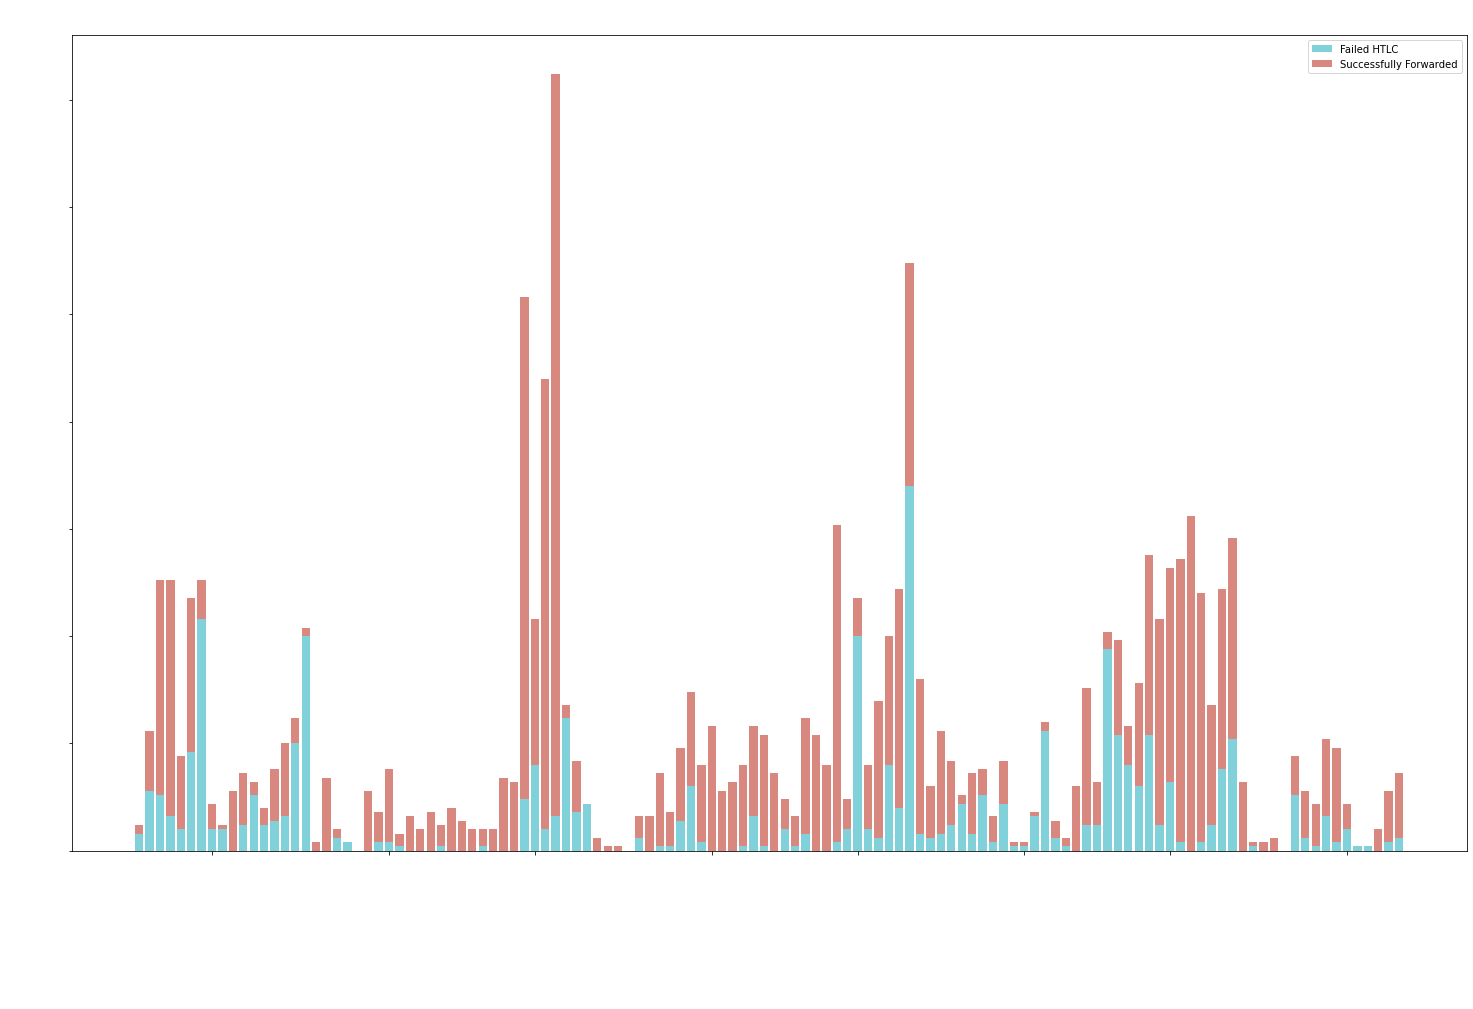

In [11]:
labels = htlc_count.index
htlc = htlc_count
fwds = fwds_count

fig, ax = plt.subplots(figsize = (25, 15))

ax.bar(labels, fwds, label = 'Failed HTLC', color=['#80D1D9'])
ax.bar(labels, htlc, bottom=fwds, label = 'Successfully Forwarded', color=['#D98880'])
plt.xticks(rotation=45)
plt.legend()
ax.set_title(f'Routes vs failed HTLCs', fontsize=30, color='white')

plt.yticks(fontsize=30, color='white')
plt.xticks(fontsize=30, color='white')

plt.show()